In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


The first attempt score was 0.38 , predicted based on the gender column. The second attempt was made analysing and understanding information on kaggle. The flow goes as below,
1. Importing basic libraries
2. Reading the data sets 
3. Analysing the given data
4. Missing values in train and test datasets
5. Visualisation Functions 
6. Cleaning data and visualising the plots
7. Analysing the correlation matrix
8. Assigning the train and test data
9. Working on the model

1. Importing basic libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
# To filter warnings
import warnings
warnings.filterwarnings('ignore')


2. Reading the data sets 

In [3]:
traindf=pd.read_csv("../input/titanic/train.csv")
testdf=pd.read_csv("../input/titanic/test.csv")
mergedata=pd.concat([traindf, testdf], ignore_index = True, sort = False)


3. Analysing the given data

   There are a total of 1309 rows with 12 columns 

In [4]:
print("\n Size of data \n ", mergedata.shape)
print("\n Columns \n",mergedata.columns)


 Size of data 
  (1309, 12)

 Columns 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
mergedata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
mergedata.info()
print("-"*40)
mergedata.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
----------------------------------------


PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [7]:
mergedata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


4. Missing values in train and test datasets

*    Train dataset has missing values in Age,Cabin and Embarked features
*   Test dataset has missing values in Age,Fare and Cabin features

In [8]:
print("\n * Missing values-train dataset \n \n",traindf.isnull().sum())
print("\n * Missing values-test dataset \n \n", testdf.isnull().sum())


 * Missing values-train dataset 
 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 * Missing values-test dataset 
 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


The below heatmap(color-coded matrix rectangular plot) reveals the missing values in Age, Cabin, Embarked in train dataset

Text(0.5, 1.0, 'Missing values')

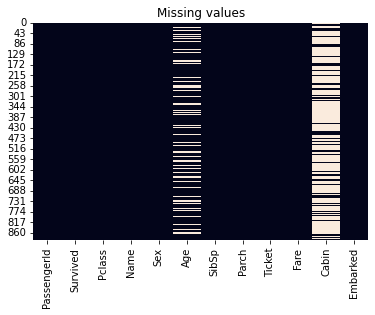

In [9]:
traindf.isnull().sum()
sns.heatmap(traindf.isnull(), cbar = False).set_title("Missing values")

The below heatmap(color-coded matrix rectangular plot) reveals the missing values in Age, Cabin, Fare in test dataset

Text(0.5, 1.0, 'Missing values')

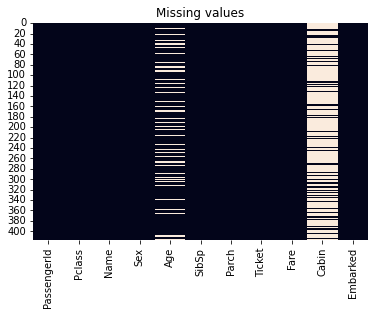

In [10]:
testdf.isnull().sum()
sns.heatmap(testdf.isnull(), cbar = False).set_title("Missing values")

5. Visualisation Functions
> Featureplot function commands (Ploting percentage each feature)
* sns.set      - Choosing seaborn theme(deep, muted, pastel, bright, dark, and colorblind)
* plt.subplots - Function that creates subplots and takes arguments,figure and axes object(s).
* ax.patches   - Rectangular patches with face color and edge color
* ax.annotate  - Annotate the point with text.


In [11]:
def featureplot(feature, x=6, y=5):
    sns.set(style="darkgrid",font_scale=1.5)
    fig,ax=plt.subplots(figsize=(x,y))
    fig=traindf[feature].value_counts(normalize=True).mul(100).round(2).sort_index().plot(ax=ax,kind="bar",color="pink")
    for p in ax.patches:
            ax.annotate(p.get_height().astype(str)+"%",(p.get_x()+p.get_width()/2,1+p.get_height()),ha="center")
    # plot details
    ax.set_ylim(0,100)
    ax.set_xlabel(feature,fontsize=20)
    ax.set_ylabel("percentage",fontsize=20)
    ax.set_xticklabels(sorted(traindf[feature].dropna().unique()),rotation=360,fontsize=15)
    plt.setp(fig.get_yticklabels(),fontsize=15)
    ax.set_title("{} distribution".format(feature),fontsize=20)
    return fig 


> Survival plot function commands
* sns.set      - Choosing seaborn theme(deep, muted, pastel, bright, dark, and colorblind)
* sns.color_palette- Choosing the color for the plot
* sns.catplot-Figure level interface for drawing categorical plots onto a FacetGrid.

In [12]:
def survivalpivot(feature):
    return traindf.pivot_table("Survived",index =feature).mul(100).round(2).reset_index()
def survivalplot(feature,h=5,a=1):
    sns.set(style="whitegrid",color_codes=True, font_scale=1.5)
    pal=sns.color_palette("crest",len(survivalpivot(feature)))
    rank=survivalpivot(feature)["Survived"].argsort().argsort()
    g=sns.catplot(data=survivalpivot(feature),x=feature, y="Survived",kind="bar",dodge=False,hue=feature, palette=np.array(pal[::1])[rank],height=h,aspect=a)
    for p in g.ax.patches:
        g.ax.annotate(p.get_height().astype(str)+"%",(p.get_x()+p.get_width()/2,1+p.get_height()),ha="center")
    #plot details
    g.ax.set_ylim(0,100)
    g.add_legend()
    g.ax.set_xlabel(feature,fontsize=20)
    g.ax.set_ylabel("percentage",fontsize=20)
    plt.setp(g.ax.get_yticklabels(),fontsize=15)
    g.ax.set_title("{} plot".format(feature),fontsize=20)
    g.add_legend
    return g   

6. Cleaning data and visualising the plots

   As the train and test datasets both contain the missing values for Embarked, Age, Cabin and Fare we combine both the datasets and work on them.The column data is cleaned in the following sequence 
   
*    Embark
*    Sex
*    PClass
*    Age
*    cabin
*    Ticket
*    Fare
*    Name
*    Sibsp & Parch



Embark Column

> Embark means " begin a Journey".Embarked has two missing values which is filled by the function "mode", that considers the most repeated boarding points among Southampton, Cherbourg, and Queenstown. we observe that about 72% of the people boarded from Southampton,about 18% boarded from Cherbourg and less than 10% from Queenstown.


In [13]:
combine=[traindf,testdf]
for data in combine:
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

* Mapping the embarked column to numerical data values  and visualising them

<AxesSubplot:title={'center':'Embarked distribution'}, xlabel='Embarked', ylabel='percentage'>

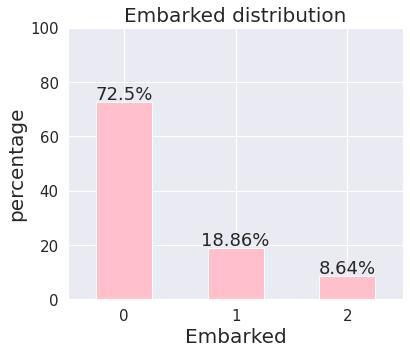

In [14]:
combine=[traindf,testdf]
for data in combine:
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
#visualisation
featureplot('Embarked')

* Comparing the Embarked feature with Survival

   Embarked  Survived
0         0     33.90
1         1     55.36
2         2     38.96


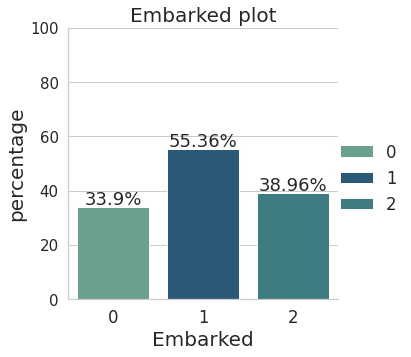

In [15]:
print(survivalpivot('Embarked'))
print(survivalplot('Embarked'))

Sex Column
>  Checking on the counts of the category(Male, Female)

In [16]:
traindf['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

* categorising the Sex column into numerical data by using Label encoder.

<AxesSubplot:title={'center':'Sex distribution'}, xlabel='Sex', ylabel='percentage'>

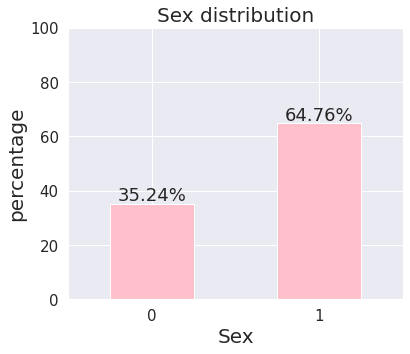

In [17]:
combine=[traindf,testdf]
for data in combine:
    label_encoder=LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
featureplot('Sex')

* Comparing the Sex Column with Survival

   Sex  Survived
0    0     74.20
1    1     18.89


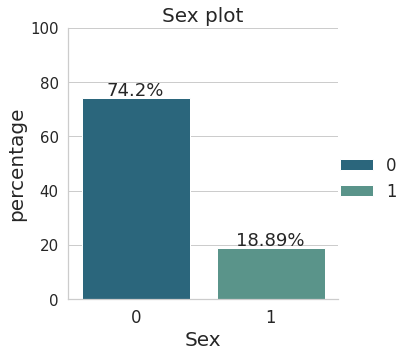

In [18]:
print(survivalpivot('Sex'))
print(survivalplot('Sex'))

Pclass Column 
* Checking on the counts of the category passenger class (Pclass1, Pclass2, Pclass3)
* count of people on Pclass3 is more 

1    216
2    184
3    491
Name: Pclass, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


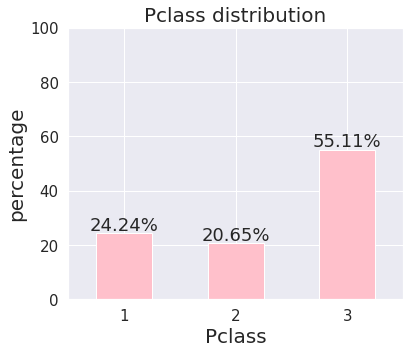

In [19]:
print(traindf['Pclass'].value_counts().sort_index())
print(featureplot('Pclass'))

* Visualising the Pclass plots -The plot says that people in Pclass1 have a higher survival rate

   Pclass  Survived
0       1     62.96
1       2     47.28
2       3     24.24


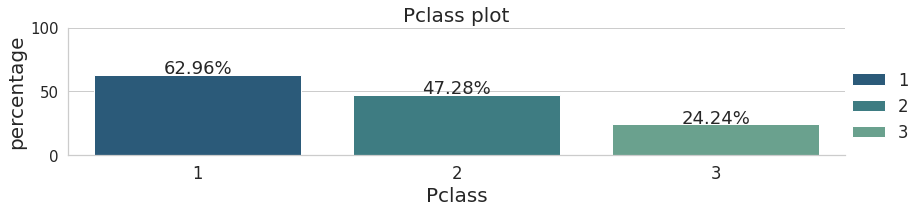

In [20]:

print(survivalpivot('Pclass'))
print(survivalplot('Pclass',3,4))

Age Column

* For filling the missing values in the age column , we can predict them based on the relation they have with Gender and Pclass. So use median values of age based on Pclass and Gender combinations.
* Categorise the age  column based on the age range as (0-0)=0; (10-20)=1; (20-40)=2; (40-50)=3 ; (50-60)=4; (>60)=5; to reperesent them as continuous numerical values.

<AxesSubplot:title={'center':'Age distribution'}, xlabel='Age', ylabel='percentage'>

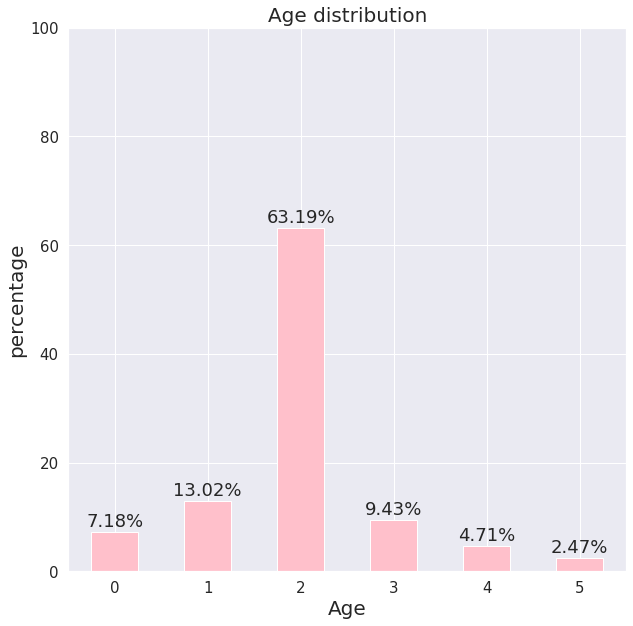

In [21]:

#filling missing values in Age column  
fillage=np.zeros((2,3))
for data in combine:
    for i in range(0,2):
           for j in range(0,3):
                filldf=data[(data['Sex']==i)&(data['Pclass']==j+1)]['Age'].dropna()
                agefill=filldf.median()
                fillage[i,j]=int(agefill/0.5+0.5)*0.5
    for i in range(0,2):
        for j in range(0,3):
               data.loc[(data.Age.isnull())& (data.Sex==i)&(data.Pclass==j+1),'Age']=fillage[i,j]
    data['Age']=data['Age'].astype(int)
#categorising Age 
for data in combine:
    data.loc[data['Age'] <= 10, 'Age'] = 0
    data.loc[(data['Age'] > 10) & (data['Age'] <= 20), 'Age'] = 1
    data.loc[(data['Age'] > 20) & (data['Age'] <= 40), 'Age'] = 2
    data.loc[(data['Age'] > 40) & (data['Age'] <= 50), 'Age'] = 3
    data.loc[(data['Age'] > 50) & (data['Age'] <= 60), 'Age'] = 4
    data.loc[data['Age'] > 60, 'Age'] = 5
featureplot('Age',10,10)


   Age  Survived
0    0     59.38
1    1     37.93
2    2     36.41
3    3     39.29
4    4     40.48
5    5     22.73


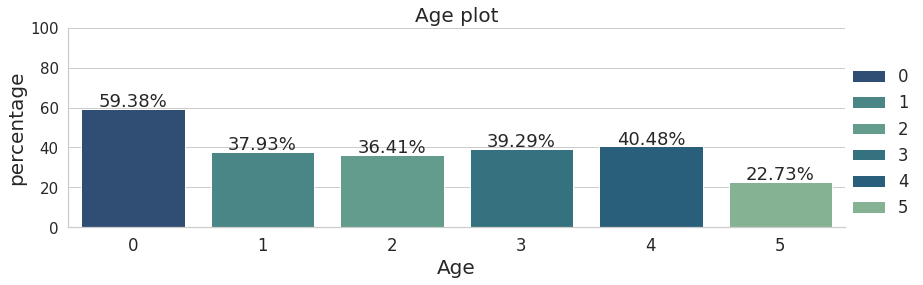

In [22]:
print(survivalpivot('Age'))
print(survivalplot('Age',4,3))

Cabin Column

* Filling the Missing values in Cabin Column after mapping with a new categorised column Deck.
If we observe the letters in the cabin number they refer to decks that ranges from A to G, which is mapped as a new feature.The missing values will be converted to zero. 

In [23]:
Decks=traindf["Cabin"]
pd.unique(Decks.replace("([0-9])*","",regex=True))

array([nan, 'C', 'E', 'G', 'D', 'A', 'C C C', 'B', 'F', 'F G', 'D D',
       'B B', 'F E', 'C C', 'B B B B', 'T', 'B B B'], dtype=object)

<AxesSubplot:title={'center':'Deck distribution'}, xlabel='Deck', ylabel='percentage'>

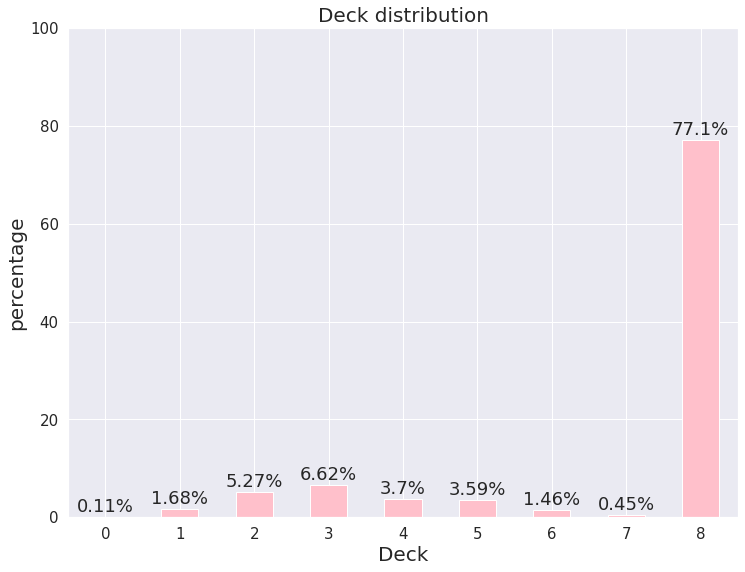

In [24]:

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
combine = [traindf, testdf]
for data in combine:
    data['Cabin'] = data['Cabin'].fillna("U0")
    data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    data['Deck'] = data['Deck'].map(deck)
    data['Deck'] = data['Deck'].fillna(0)
    data['Deck'] = data['Deck'].astype(int)
featureplot('Deck',12,9)

   Deck  Survived
0     0      0.00
1     1     46.67
2     2     74.47
3     3     59.32
4     4     75.76
5     5     75.00
6     6     61.54
7     7     50.00
8     8     29.99


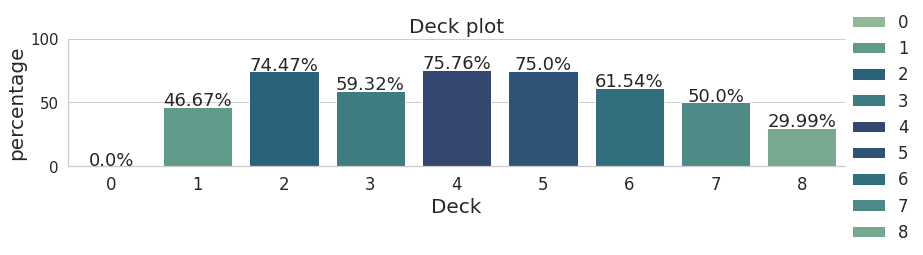

In [25]:
print(survivalpivot('Deck'))
print(survivalplot('Deck',3,4))

Ticket Column

* If we look at the ticket column , we can say that the prefixes tell us about the embarkment place. Example "STON", "PARIS" etc.,gives us an idea. We can  keep the ticket numbers and remove the prefixes so that we can predict based on the info about the people on-board.Some of this info is missed in the cabin column so we retain the ticket numbers to understand it better.

In [26]:
tickets=traindf["Ticket"]
pd.unique(tickets.replace("([0-9]*)","",regex=True))

array(['A/ ', 'PC ', 'STON/O. ', '', 'PP ', 'A/. ', 'C.A. ', 'A./. ',
       'SC/Paris ', 'S.C./A.. ', 'CA ', 'S.P. ', 'S.O.C. ', 'SO/C ',
       'W./C. ', 'SOTON/OQ ', 'W.E.P. ', 'STON/O . ', 'A. ', 'C ',
       'SOTON/O.Q. ', 'SC/PARIS ', 'S.O.P. ', 'A.. ', 'Fa ', 'CA. ',
       'LINE', 'F.C.C. ', 'W/C ', 'SW/PP ', 'SCO/W ', 'P/PP ', 'SC ',
       'SC/AH ', 'A/S ', 'SC/AH Basle ', 'WE/P ', 'S.W./PP ',
       'S.O./P.P. ', 'F.C. ', 'SOTON/O ', 'S.C./PARIS ', 'C.A./SOTON '],
      dtype=object)

In [27]:
traindf["TicketNumber"] = pd.to_numeric(traindf["Ticket"].replace(".* {1}([0-9]*)$", "\\1", regex=True).replace("LINE","0")).astype("int64")
ticket=testdf["Ticket"]
pd.unique(ticket.replace("([0-9]*)","",regex=True))
testdf["TicketNumber"] = pd.to_numeric(testdf["Ticket"].replace(".* {1}([0-9]*)$", "\\1", regex=True).replace("LINE","0")).astype("int64")

* Dropping the Cabin column as we have already mapped it with the new feature deck. Ticket column can also be dropped as the Ticket numbers are considered. 

In [28]:
traindf=traindf.drop(['Cabin','Ticket'],axis=1)
testdf=testdf.drop(['Cabin','Ticket'],axis=1)


Fare Column
* Filling the missing data in the Fare column and categorising the Fare column

<AxesSubplot:title={'center':'Fare distribution'}, xlabel='Fare', ylabel='percentage'>

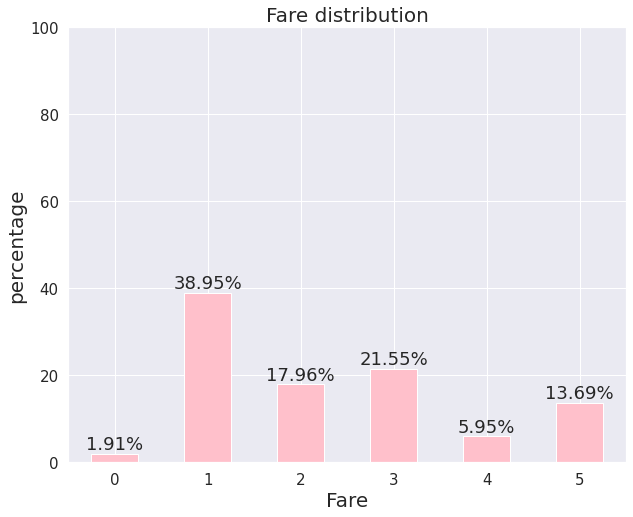

In [29]:
combine = [traindf, testdf]
for data in combine:
    data['Fare'] = data['Fare'].fillna(0)
    data['Fare'] = data['Fare'].astype(int)
testdf['Fare'].fillna(testdf['Fare'].dropna().median(), inplace=True)
for data in combine:
    data.loc[data['Fare'] <= 5, 'Fare'] = 0
    data.loc[(data['Fare'] > 5) & (data['Fare'] <= 10), 'Fare'] = 1
    data.loc[(data['Fare'] > 10) & (data['Fare'] <= 20), 'Fare'] = 2
    data.loc[(data['Fare'] > 20) & (data['Fare'] <= 40), 'Fare'] = 3
    data.loc[(data['Fare'] > 40) & (data['Fare'] <= 60), 'Fare'] = 4
    data.loc[data['Fare'] > 60, 'Fare'] = 5
featureplot('Fare',10,8)


   Fare  Survived
0     0      5.88
1     1     21.61
2     2     44.38
3     3     42.71
4     4     58.49
5     5     67.21


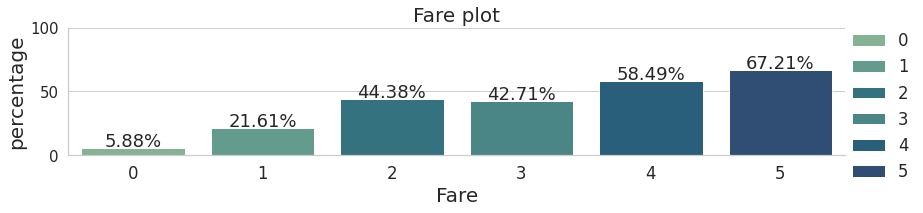

In [30]:
print(survivalpivot('Fare'))
print(survivalplot('Fare',3,4))

Name Column
* Categorising the Name column based on the honorifics Mr,Mrs,Miss,Master etc., The honorifics of the name give us some idea on the age,gender of the passengers.

In [31]:
traindf['Name'].value_counts()


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [32]:
combine=[traindf,testdf]
for data in combine:
    data['Honorific']=data.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(traindf['Honorific'],traindf['Sex'])

Sex,0,1
Honorific,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


<AxesSubplot:title={'center':'Honorific distribution'}, xlabel='Honorific', ylabel='percentage'>

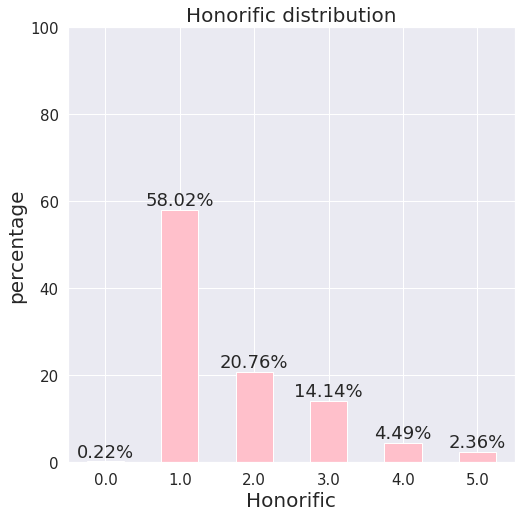

In [33]:
for data in combine:
    data['Honorific']=data['Honorific'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
    data['Honorific']=data['Honorific'].replace(['Countess','Lady','Sir'],'Royal')
    data['Honorific']=data['Honorific'].replace(['Mlle','Ms'],'Miss')
    data['Honorific']=data['Honorific'].replace('Mme','Mrs')
for data in combine:
    Honorific_map={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
    data['Honorific']=data['Honorific'].map(Honorific_map)
    data['Honorific']=data['Honorific'].fillna(0)   
featureplot('Honorific',8,8)

   Honorific  Survived
0        0.0    100.00
1        1.0     15.67
2        2.0     70.27
3        3.0     79.37
4        4.0     57.50
5        5.0     28.57


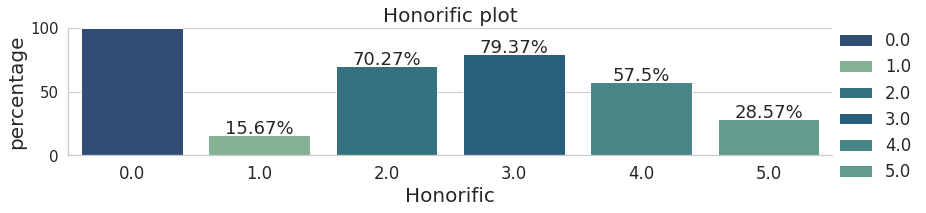

In [34]:
print(survivalpivot('Honorific'))
print(survivalplot('Honorific',3,4))

Dropping the Name and passengerId

In [35]:
traindf=traindf.drop(['Name','PassengerId'],axis=1)
testdf=testdf.drop(['Name'],axis=1)


SibSp & Parch Column

* Looking into the family considering the siblings, children and parents.Also looking into passengers who travelled alone 

<AxesSubplot:title={'center':'Parch distribution'}, xlabel='Parch', ylabel='percentage'>

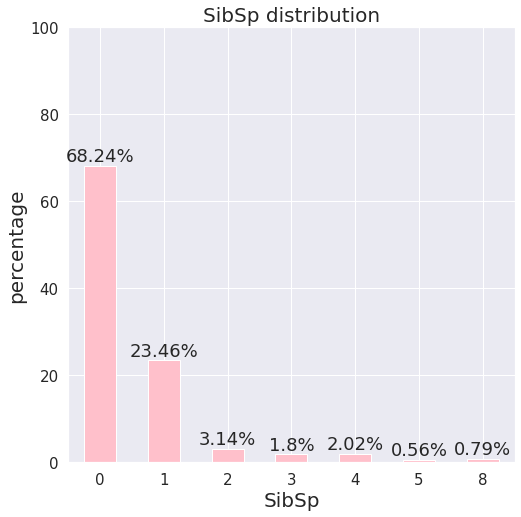

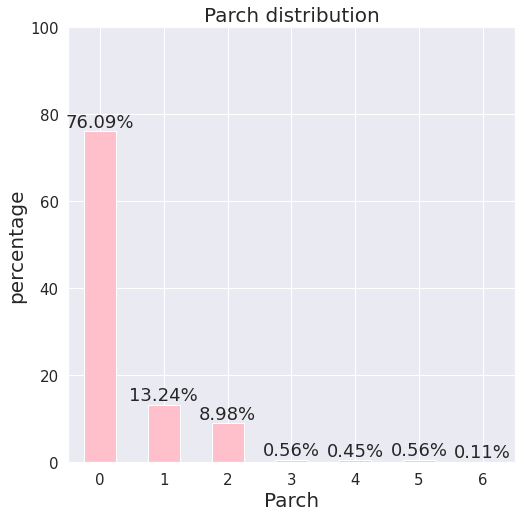

In [36]:
featureplot('SibSp',8,8)
featureplot('Parch',8,8)

In [37]:
combine= [traindf,testdf]
for data in combine:
    data['Family'] = data["Parch"] + data["SibSp"] + 1
for data in combine:
    data['IsAlone'] = 0
    data.loc[data['Family'] == 1, 'IsAlone'] = 1
traindf.drop(['Parch', 'SibSp'], inplace = True, axis = 1)
testdf.drop(['Parch', 'SibSp'], inplace = True, axis = 1)


   Family  Survived
0       1     30.35
1       2     55.28
2       3     57.84
3       4     72.41
4       5     20.00
5       6     13.64
6       7     33.33
7       8      0.00
8      11      0.00
   IsAlone  Survived
0        0     50.56
1        1     30.35


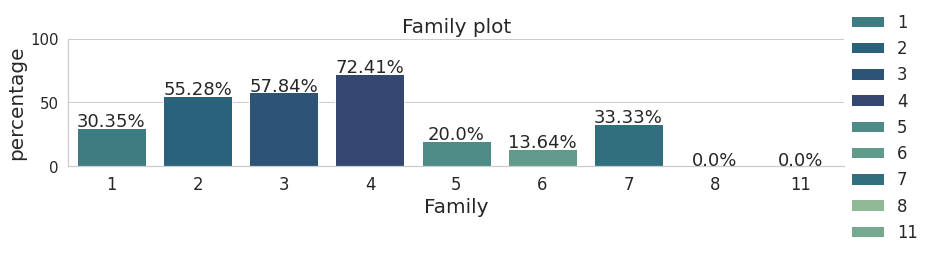

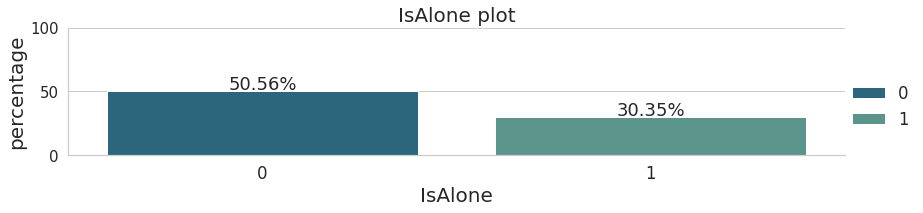

In [38]:
print(survivalpivot('Family'))
print(survivalplot('Family',3,4))
print(survivalpivot('IsAlone'))
print(survivalplot('IsAlone',3,4))

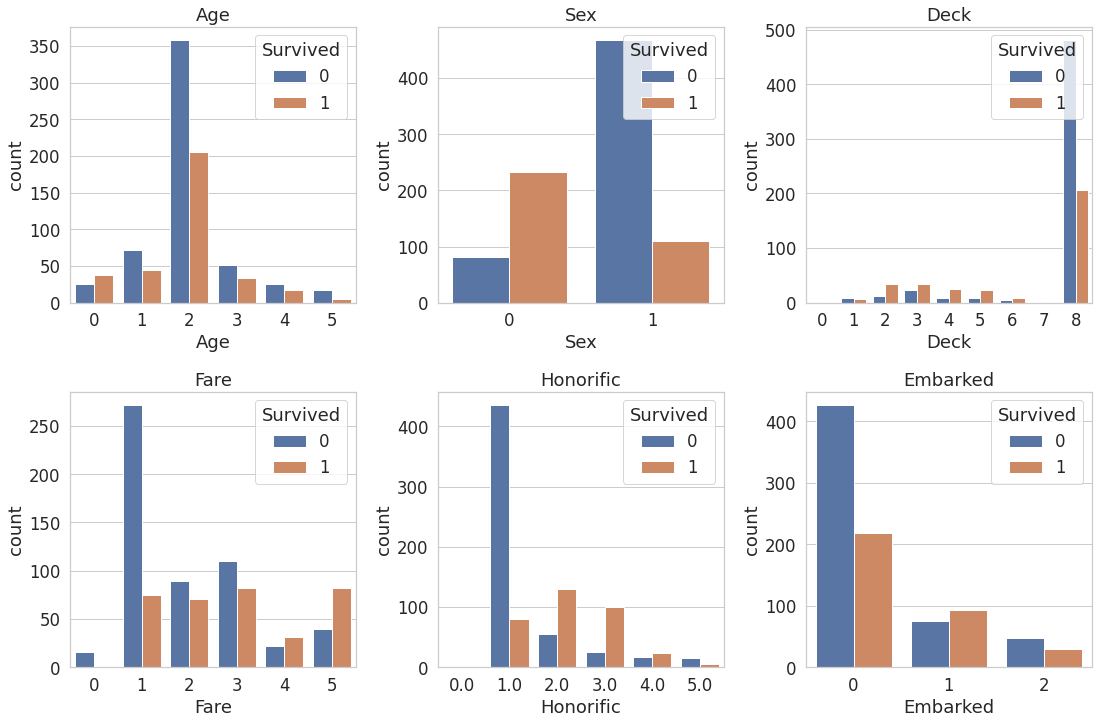

In [39]:
data_col=['Age','Sex','Deck','Fare','Honorific','Embarked']
ncol=3
nrow=2
fig,pos=plt.subplots(nrow,ncol,figsize=(ncol*5.2,nrow*5.2))
for row in range(0,nrow):
    for col in range(0,ncol):
        i=row*ncol+col
        p=pos[row][col]
        sns.countplot(traindf[data_col[i]],hue=traindf['Survived'],ax=p)
        p.set_title(data_col[i])
        p.legend(title='Survived',loc='upper right')
plt.tight_layout()    

7.Analysing the correlation matrix

Correlation matrix gives us some idea on the correlation between the features and to visualise the patterns in the data

In [40]:
traindf.corr()["Survived"].sort_values(ascending=False)

Survived        1.000000
Honorific       0.397223
Fare            0.329368
Embarked        0.106811
Family          0.016639
Age            -0.082087
TicketNumber   -0.095605
IsAlone        -0.203367
Deck           -0.289569
Pclass         -0.338481
Sex            -0.543351
Name: Survived, dtype: float64

<AxesSubplot:>

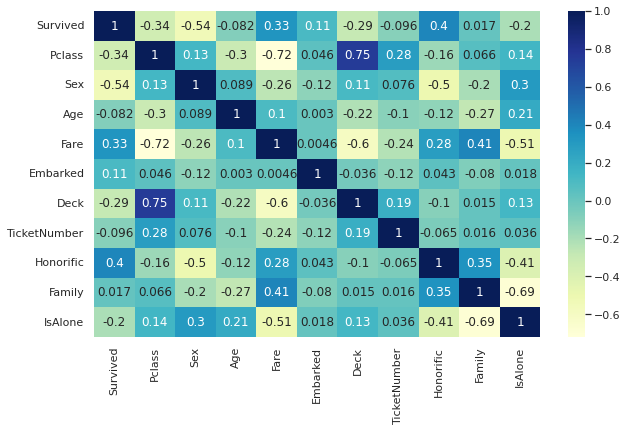

In [41]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(traindf.corr(),annot=True, fmt='.2g',cmap='YlGnBu')

8. Assigning the train and test data

In [42]:
X_train = traindf.drop("Survived", axis=1)
Y_train = traindf["Survived"]
X_test  = testdf.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape



((891, 10), (891,), (418, 10))

9. Working on the model

* There are many models we can choose from but random forest was found to give highest score among models. So we are using this model for results.



In [43]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.55

In [44]:
my_submission = pd.DataFrame({'PassengerId': testdf.PassengerId, 'Survived':Y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)
my_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
